Extract Data

In [274]:
import zipfile
import os

# Define the zip path and extraction path
zip_path = r"E:\Sakthi\prasanth\projects\household\power\Scripts\individual+household+electric+power+consumption.zip"
extract_to = r"E:\Sakthi\prasanth\projects\household\power\Scripts\extracted_data"

# Create target directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("ZIP extracted successfully to:", extract_to)


ZIP extracted successfully to: E:\Sakthi\prasanth\projects\household\power\Scripts\extracted_data


Install Packages

# Want to install Packages
pip install pandas numpy matplotlib seaborn

Data Cleaning

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'E:\Sakthi\prasanth\projects\household\power\Scripts\extracted_data\household_power_consumption.txt'
data = pd.read_csv(file_path, sep=';')

display(data.head())

print(data.shape)

print(data.info())

C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_13900\1262494623.py:7: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


(2075259, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None


In [276]:
data.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [277]:
# To change the datatype

import pandas as pd
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in cols_to_convert:
  # Using errors='coerce' to make non-numeric values as NaN
  data[col] = pd.to_numeric(data[col], errors='coerce')

print(data.isna().sum())

print(data.shape)

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
(2075259, 9)


In [278]:
# To show all rows that contain at least one missing value
missing_values = data[data.isnull().any(axis=1)]

print(missing_values)


               Date      Time  Global_active_power  Global_reactive_power  \
6839     21/12/2006  11:23:00                  NaN                    NaN   
6840     21/12/2006  11:24:00                  NaN                    NaN   
19724    30/12/2006  10:08:00                  NaN                    NaN   
19725    30/12/2006  10:09:00                  NaN                    NaN   
41832     14/1/2007  18:36:00                  NaN                    NaN   
...             ...       ...                  ...                    ...   
1990185   28/9/2010  19:09:00                  NaN                    NaN   
1990186   28/9/2010  19:10:00                  NaN                    NaN   
1990187   28/9/2010  19:11:00                  NaN                    NaN   
1990188   28/9/2010  19:12:00                  NaN                    NaN   
2027411  24/10/2010  15:35:00                  NaN                    NaN   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839 

In [279]:
# Drop
data.dropna(inplace=True)
print(data.isnull().sum())

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [280]:
# Shape
data.shape

(2049280, 9)

In [281]:
display(data.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Global_active_power Handling

<Axes: >

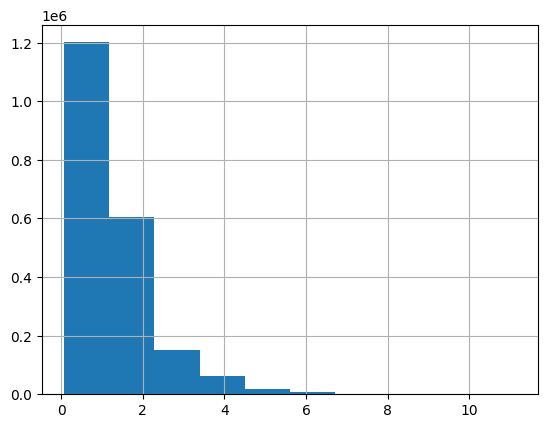

In [282]:
data['Global_active_power'].hist()

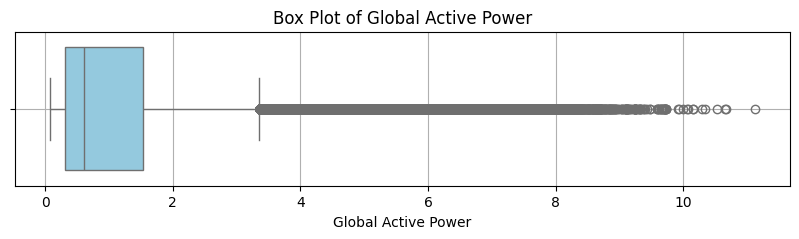

In [283]:
# Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=data['Global_active_power'], color='skyblue')
plt.title('Box Plot of Global Active Power')
plt.xlabel('Global Active Power')
plt.grid(True)
plt.show()

In [284]:
data[data['Global_active_power']>3].value_counts()

Date      Time      Global_active_power  Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3
1/1/2007  09:19:00  3.504                0.110                  238.52   14.6              0.0             0.0             16.0              1
          09:20:00  3.502                0.108                  238.12   14.6              0.0             0.0             18.0              1
          09:21:00  3.498                0.108                  238.41   14.6              0.0             0.0             18.0              1
          09:22:00  3.406                0.000                  238.19   14.2              0.0             0.0             17.0              1
          09:23:00  3.398                0.000                  238.60   14.2              0.0             0.0             18.0              1
                                                                                                                                            ..
9/9/

In [285]:
# Detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Print lower and upper IQR bounds
    print(f"\nColumn: {column}")
    print(f"  Q1 (25th percentile): {Q1}")
    print(f"  Q3 (75th percentile): {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {lower_bound}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {upper_bound}")
    
    return outliers

# Specifying the column here 
column = ['Global_active_power']

print("\nOutlier Detection")
for col in column:
    if col in data.columns:
        outliers = detect_outliers_iqr(data, col)
        print(f"Number of outliers in '{col}': {len(outliers)}")
    else:
        print(f"'{col}' Column not found")


Outlier Detection

Column: Global_active_power
  Q1 (25th percentile): 0.308
  Q3 (75th percentile): 1.528
  IQR: 1.22
  Lower Bound (Q1 - 1.5*IQR): -1.522
  Upper Bound (Q3 + 1.5*IQR): 3.358
Number of outliers in 'Global_active_power': 94907


In [286]:
import numpy as np
# Cap only upper bound outliers using the IQR method
data['Global_active_power'] = np.where(
                      data['Global_active_power']>3.358,
                       3.358,data['Global_active_power']
   )

In [287]:
display(data)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,3.358,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,3.358,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,3.358,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,3.358,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.358,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


Handling Global_reactive_power

<Axes: >

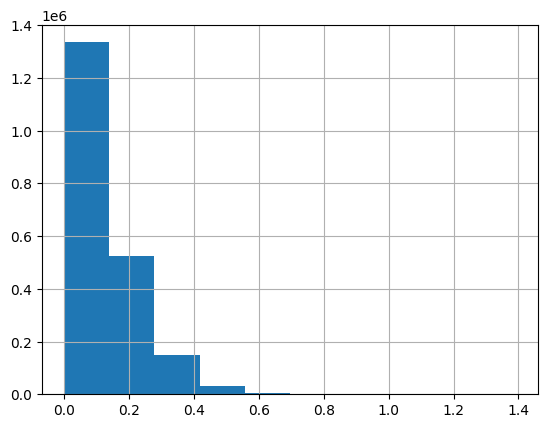

In [288]:
data['Global_reactive_power'].hist()

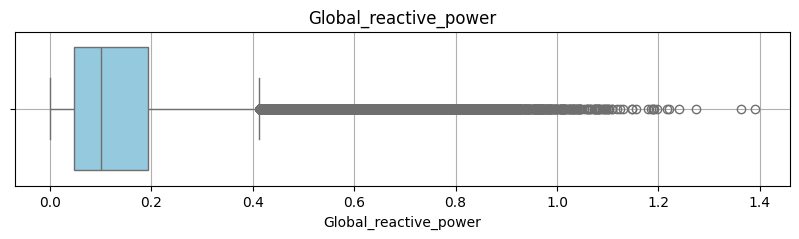

In [289]:
# Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=data['Global_reactive_power'], color='skyblue')
plt.title('Global_reactive_power')
plt.xlabel('Global_reactive_power')
plt.grid(True)
plt.show()

In [290]:
import numpy as np

# Column name
col = 'Global_reactive_power'

# Compute mean and standard deviation
mean = data[col].mean()
std = data[col].std()

# Define SD bounds (here, mean ± 3*std)
lower = mean - 3 * std
upper = mean + 3 * std

# Print bounds
print(f"Column: {col}")
print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std:.3f}")
print(f"Lower Bound (mean - 3*std): {lower:.3f}")
print(f"Upper Bound (mean + 3*std): {upper:.3f}")

below = (data[col] < lower).sum()
above = (data[col] > upper).sum()
print(f"Outliers below lower bound: {below}")
print(f"Outliers above upper bound: {above}")

Column: Global_reactive_power
Mean: 0.124
Standard Deviation: 0.113
Lower Bound (mean - 3*std): -0.214
Upper Bound (mean + 3*std): 0.462
Outliers below lower bound: 0
Outliers above upper bound: 24480


In [291]:
data[col] = data[col].clip(upper=upper)
print("\nCapping applied")


Capping applied


In [292]:
display(data.columns)

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

Handling Voltage

<Axes: >

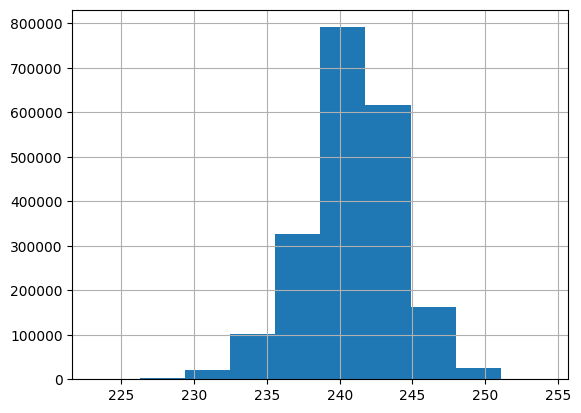

In [293]:
data['Voltage'].hist()

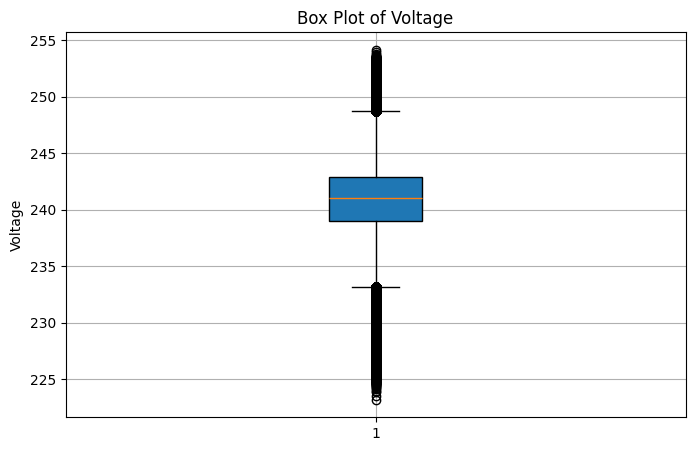

In [294]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.boxplot(data['Voltage'], vert=True, patch_artist=True)
plt.title('Box Plot of Voltage')
plt.ylabel('Voltage')
plt.grid(True)
plt.show()

In [295]:
import numpy as np

# Column name
col = 'Voltage'

# Compute mean and standard deviation
mean = data[col].mean()
std = data[col].std()

# Define SD bounds (here, mean ± 3*std)
lower = mean - 3.5 * std
upper = mean + 3.5 * std

# Print bounds
print(f"Column: {col}")
print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std:.3f}")
print(f"Lower Bound (mean - 3*std): {lower:.3f}")
print(f"Upper Bound (mean + 3*std): {upper:.3f}")

below = (data[col] < lower).sum()
above = (data[col] > upper).sum()
print(f"Outliers below lower bound: {below}")
print(f"Outliers above upper bound: {above}")

Column: Voltage
Mean: 240.840
Standard Deviation: 3.240
Lower Bound (mean - 3*std): 229.500
Upper Bound (mean + 3*std): 252.180
Outliers below lower bound: 3717
Outliers above upper bound: 284


In [296]:
data[col] = data[col].clip(lower=lower,upper=upper)
print("\nCapping applied")


Capping applied


<Axes: >

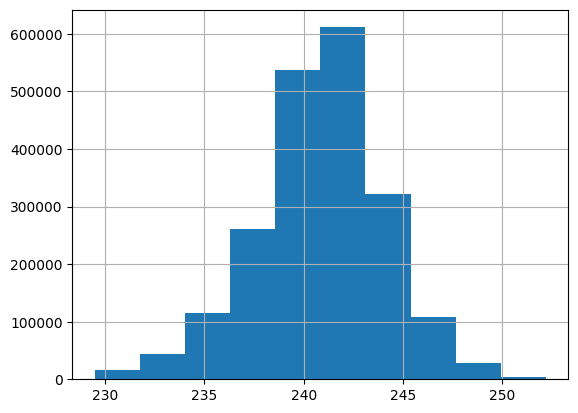

In [297]:
data['Voltage'].hist()

In [298]:
print(data.columns)

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


Handling Global_intensity

<Axes: >

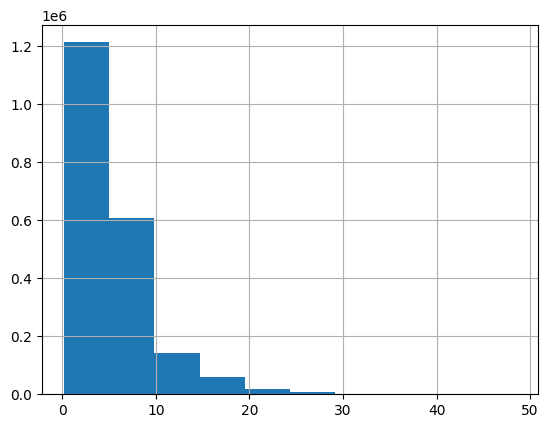

In [299]:
data['Global_intensity'].hist()

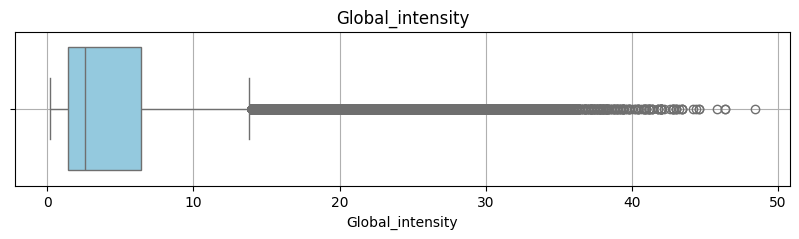

In [300]:
# Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=data['Global_intensity'], color='skyblue')
plt.title('Global_intensity')
plt.xlabel('Global_intensity')
plt.grid(True)
plt.show()

In [301]:
import numpy as np

# Column name
col = 'Global_intensity'

# Compute mean and standard deviation
mean = data[col].mean()
std = data[col].std()

# Define SD bounds (here, mean ± 3*std)
lower = mean - 3 * std
upper = mean + 3 * std

# Print bounds
print(f"Column: {col}")
print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std:.3f}")
print(f"Lower Bound (mean - 3*std): {lower:.3f}")
print(f"Upper Bound (mean + 3*std): {upper:.3f}")

below = (data[col] < lower).sum()
above = (data[col] > upper).sum()
print(f"Outliers below lower bound: {below}")
print(f"Outliers above upper bound: {above}")

Column: Global_intensity
Mean: 4.628
Standard Deviation: 4.444
Lower Bound (mean - 3*std): -8.705
Upper Bound (mean + 3*std): 17.961
Outliers below lower bound: 0
Outliers above upper bound: 37434


In [302]:
data[col] = data[col].clip(upper=upper)
print("\nCapping applied")


Capping applied


In [303]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

Handling Sub_metering_1

<Axes: >

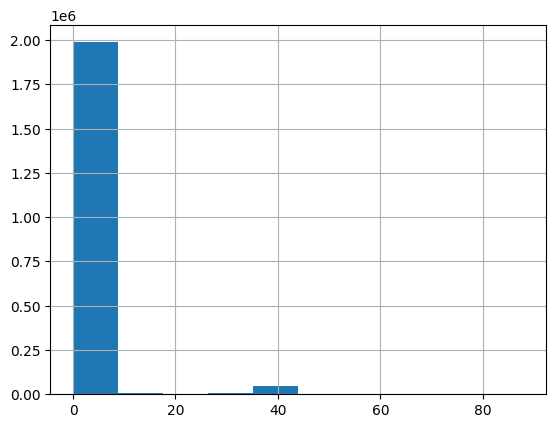

In [304]:
data['Sub_metering_1'].hist()

In [305]:
# Detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Print lower and upper IQR bounds
    print(f"\nColumn: {column}")
    print(f"  Q1 (25th percentile): {Q1}")
    print(f"  Q3 (75th percentile): {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {lower_bound}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {upper_bound}")
    
    return outliers

# Specifying the column here 
column = ['Sub_metering_1']

print("\nOutlier Detection")
for col in column:
    if col in data.columns:
        outliers = detect_outliers_iqr(data, col)
        print(f"Number of outliers in '{col}': {len(outliers)}")
    else:
        print(f"'{col}' Column not found")


Outlier Detection

Column: Sub_metering_1
  Q1 (25th percentile): 0.0
  Q3 (75th percentile): 0.0
  IQR: 0.0
  Lower Bound (Q1 - 1.5*IQR): 0.0
  Upper Bound (Q3 + 1.5*IQR): 0.0
Number of outliers in 'Sub_metering_1': 169105


Handling Sub_metering_2

<Axes: >

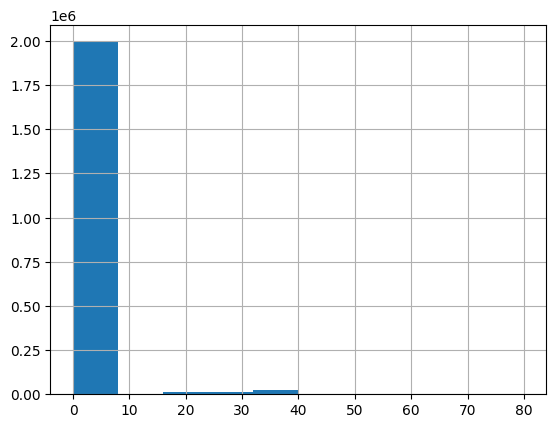

In [306]:
data['Sub_metering_2'].hist()

<Axes: >

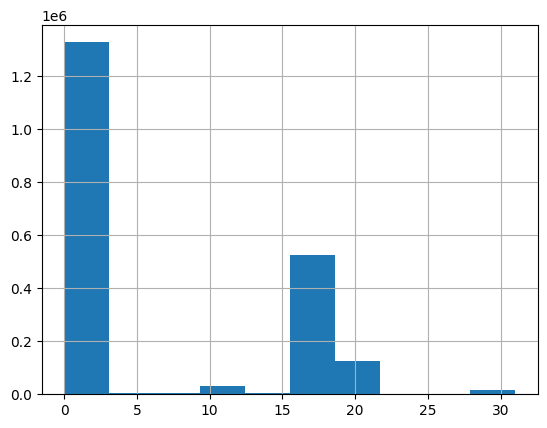

In [307]:
data['Sub_metering_3'].hist()

In [308]:
# Detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Print lower and upper IQR bounds
    print(f"\nColumn: {column}")
    print(f"  Q1 (25th percentile): {Q1}")
    print(f"  Q3 (75th percentile): {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {lower_bound}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {upper_bound}")
    
    return outliers

# Specifying the column here 
column = ['Sub_metering_3']

print("\nOutlier Detection")
for col in column:
    if col in data.columns:
        outliers = detect_outliers_iqr(data, col)
        print(f"Number of outliers in '{col}': {len(outliers)}")
    else:
        print(f"'{col}' Column not found")


Outlier Detection

Column: Sub_metering_3
  Q1 (25th percentile): 0.0
  Q3 (75th percentile): 17.0
  IQR: 17.0
  Lower Bound (Q1 - 1.5*IQR): -25.5
  Upper Bound (Q3 + 1.5*IQR): 42.5
Number of outliers in 'Sub_metering_3': 0


Creating Time-Based Features

In [272]:
display(data)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,3.358,0.41800,234.84,17.960948,0.0,1.0,17.0
1,16/12/2006,17:25:00,3.358,0.43600,233.63,17.960948,0.0,1.0,16.0
2,16/12/2006,17:26:00,3.358,0.46188,233.29,17.960948,0.0,2.0,17.0
3,16/12/2006,17:27:00,3.358,0.46188,233.74,17.960948,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.358,0.46188,235.68,15.800000,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.00000,240.43,4.000000,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.00000,240.00,4.000000,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.00000,239.82,3.800000,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.00000,239.70,3.800000,0.0,0.0,0.0


In [309]:
data.to_csv('cleaned_data.csv', index=False)

In [23]:
data = pd.read_csv('E:\Sakthi\prasanth\projects\household\power\Scripts\cleaned_data.csv')
display(data)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,3.358,0.41800,234.84,17.960948,0.0,1.0,17.0
1,16/12/2006,17:25:00,3.358,0.43600,233.63,17.960948,0.0,1.0,16.0
2,16/12/2006,17:26:00,3.358,0.46188,233.29,17.960948,0.0,2.0,17.0
3,16/12/2006,17:27:00,3.358,0.46188,233.74,17.960948,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.358,0.46188,235.68,15.800000,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2049275,26/11/2010,20:58:00,0.946,0.00000,240.43,4.000000,0.0,0.0,0.0
2049276,26/11/2010,20:59:00,0.944,0.00000,240.00,4.000000,0.0,0.0,0.0
2049277,26/11/2010,21:00:00,0.938,0.00000,239.82,3.800000,0.0,0.0,0.0
2049278,26/11/2010,21:01:00,0.934,0.00000,239.70,3.800000,0.0,0.0,0.0


In [27]:
import pandas as pd

data['Datetime'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'],
    format='%d/%m/%Y %H:%M:%S',
    errors='coerce',  # makes invalid strings NaT instead of crashing
)

In [28]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,3.358,0.41800,234.84,17.960948,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,3.358,0.43600,233.63,17.960948,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,3.358,0.46188,233.29,17.960948,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,3.358,0.46188,233.74,17.960948,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.358,0.46188,235.68,15.800000,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
2049275,26/11/2010,20:58:00,0.946,0.00000,240.43,4.000000,0.0,0.0,0.0,2010-11-26 20:58:00
2049276,26/11/2010,20:59:00,0.944,0.00000,240.00,4.000000,0.0,0.0,0.0,2010-11-26 20:59:00
2049277,26/11/2010,21:00:00,0.938,0.00000,239.82,3.800000,0.0,0.0,0.0,2010-11-26 21:00:00
2049278,26/11/2010,21:01:00,0.934,0.00000,239.70,3.800000,0.0,0.0,0.0,2010-11-26 21:01:00


In [29]:
# Set it as DatetimeIndex (inplace)
data.set_index('Datetime', inplace=True)

# Now resample by day and compute means
daily_avg = data.resample('D')[[
    'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'
]].mean()

# rename columns
daily_avg.columns = [c + '_daily_avg' for c in daily_avg.columns]

# join back to original rows (match each timestamp to its day) — keeps DatetimeIndex
data = data.join(daily_avg, on=data.index.floor('D'))


In [30]:
data

,key_0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_daily_avg,Global_reactive_power_daily_avg,Voltage_daily_avg,Global_intensity_daily_avg
Datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,16/12/2006,17:24:00,3.358,0.41800,234.84,17.960948,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702
2006-12-16 17:25:00,2006-12-16,16/12/2006,17:25:00,3.358,0.43600,233.63,17.960948,0.0,1.0,16.0,2.852621,0.086987,236.243763,12.721702
2006-12-16 17:26:00,2006-12-16,16/12/2006,17:26:00,3.358,0.46188,233.29,17.960948,0.0,2.0,17.0,2.852621,0.086987,236.243763,12.721702
2006-12-16 17:27:00,2006-12-16,16/12/2006,17:27:00,3.358,0.46188,233.74,17.960948,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702
2006-12-16 17:28:00,2006-12-16,16/12/2006,17:28:00,3.358,0.46188,235.68,15.800000,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,2010-11-26,26/11/2010,20:58:00,0.946,0.00000,240.43,4.000000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264
2010-11-26 20:59:00,2010-11-26,26/11/2010,20:59:00,0.944,0.00000,240.00,4.000000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264
2010-11-26 21:00:00,2010-11-26,26/11/2010,21:00:00,0.938,0.00000,239.82,3.800000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264


In [31]:
import pandas as pd

data['Datetime'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'],
    format='%d/%m/%Y %H:%M:%S',
    errors='coerce'  # makes invalid strings NaT instead of crashing
)

In [32]:
data['Hour'] = data['Datetime'].dt.hour

In [33]:
# Peak hour 5 PM to 9 PM
data['Is_peak_hour'] = ((data['Hour'] >= 17) & (data['Hour'] <= 21)).astype(int)

# Daytime 6 AM  to 6 PM 
data['Is_daytime'] = ((data['Hour'] >= 6) & (data['Hour'] <= 18)).astype(int)

In [34]:
data

,key_0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_daily_avg,Global_reactive_power_daily_avg,Voltage_daily_avg,Global_intensity_daily_avg,Datetime,Hour,Is_peak_hour,Is_daytime
Datetime,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,16/12/2006,17:24:00,3.358,0.41800,234.84,17.960948,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:24:00,17,1,1
2006-12-16 17:25:00,2006-12-16,16/12/2006,17:25:00,3.358,0.43600,233.63,17.960948,0.0,1.0,16.0,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:25:00,17,1,1
2006-12-16 17:26:00,2006-12-16,16/12/2006,17:26:00,3.358,0.46188,233.29,17.960948,0.0,2.0,17.0,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:26:00,17,1,1
2006-12-16 17:27:00,2006-12-16,16/12/2006,17:27:00,3.358,0.46188,233.74,17.960948,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:27:00,17,1,1
2006-12-16 17:28:00,2006-12-16,16/12/2006,17:28:00,3.358,0.46188,235.68,15.800000,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:28:00,17,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,2010-11-26,26/11/2010,20:58:00,0.946,0.00000,240.43,4.000000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,2010-11-26 20:58:00,20,1,0
2010-11-26 20:59:00,2010-11-26,26/11/2010,20:59:00,0.944,0.00000,240.00,4.000000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,2010-11-26 20:59:00,20,1,0
2010-11-26 21:00:00,2010-11-26,26/11/2010,21:00:00,0.938,0.00000,239.82,3.800000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,2010-11-26 21:00:00,21,1,0


In [36]:
data.to_csv('raw_features.csv', index = False)

In [50]:
import pandas as pd
data = pd.read_csv('E:\\Sakthi\\prasanth\\projects\\household\\power\\Scripts\\raw_features.csv')
data

,key_0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_daily_avg,Global_reactive_power_daily_avg,Voltage_daily_avg,Global_intensity_daily_avg,Datetime,Hour,Is_peak_hour,Is_daytime
0,2006-12-16,16/12/2006,17:24:00,3.358,0.41800,234.84,17.960948,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:24:00,17,1,1
1,2006-12-16,16/12/2006,17:25:00,3.358,0.43600,233.63,17.960948,0.0,1.0,16.0,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:25:00,17,1,1
2,2006-12-16,16/12/2006,17:26:00,3.358,0.46188,233.29,17.960948,0.0,2.0,17.0,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:26:00,17,1,1
3,2006-12-16,16/12/2006,17:27:00,3.358,0.46188,233.74,17.960948,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:27:00,17,1,1
4,2006-12-16,16/12/2006,17:28:00,3.358,0.46188,235.68,15.800000,0.0,1.0,17.0,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:28:00,17,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049275,2010-11-26,26/11/2010,20:58:00,0.946,0.00000,240.43,4.000000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,2010-11-26 20:58:00,20,1,0
2049276,2010-11-26,26/11/2010,20:59:00,0.944,0.00000,240.00,4.000000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,2010-11-26 20:59:00,20,1,0
2049277,2010-11-26,26/11/2010,21:00:00,0.938,0.00000,239.82,3.800000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,2010-11-26 21:00:00,21,1,0
2049278,2010-11-26,26/11/2010,21:01:00,0.934,0.00000,239.70,3.800000,0.0,0.0,0.0,1.163360,0.093262,240.291029,4.956264,2010-11-26 21:01:00,21,1,0


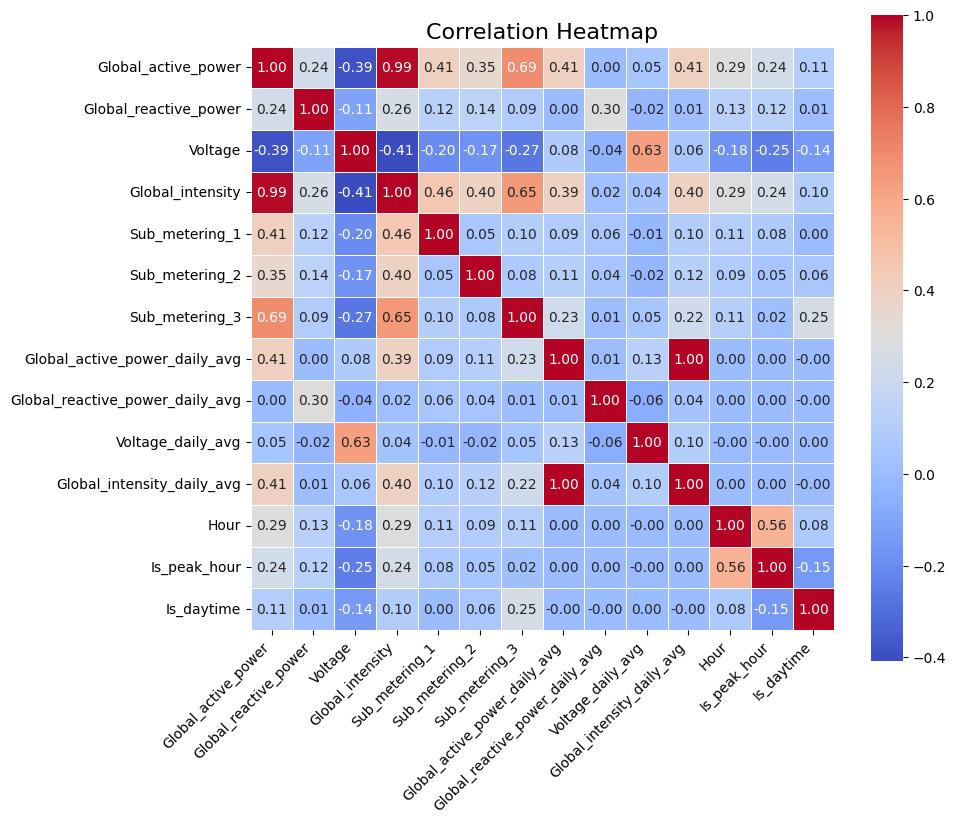

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop for correlation calculation
heatmap_data = data.drop(columns=['Date', 'Time','Datetime','key_0'], errors='ignore')

plt.figure(figsize=(10, 10))
sns.heatmap(
    heatmap_data.corr(), 
    annot=True, fmt='.2f', cmap='coolwarm', 
    square=True, linewidths=0.5, 
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Again Handling Sub meters

Feature	Represents	Example Appliances
Sub_metering_1	Kitchen appliances	Dishwasher, microwave, oven
Sub_metering_2	Laundry room appliances	Washing machine, tumble dryer, refrigerator
Sub_metering_3	Climate control / Water heating

In [52]:
data['Sub_metering_1'].value_counts()

Sub_metering_1
0.0     1880175
1.0       84936
2.0       19017
38.0      16119
37.0      14892
         ...   
82.0          3
88.0          3
87.0          3
84.0          2
86.0          2
Name: count, Length: 88, dtype: int64

In [53]:
data['Sub_metering_2'].value_counts()

Sub_metering_2
0.0     1436830
1.0      378224
2.0      157075
3.0        7189
37.0       6638
         ...   
50.0         32
77.0         24
79.0          8
78.0          3
80.0          2
Name: count, Length: 81, dtype: int64

In [55]:
data['Sub_metering_3'].value_counts()

Sub_metering_3
0.0     852092
1.0     471868
18.0    353163
17.0    156593
19.0    121326
12.0     16726
16.0     15831
11.0     11282
29.0      6931
13.0      5339
20.0      4670
28.0      4364
10.0      3309
30.0      3119
9.0       2011
6.0       1993
2.0       1970
7.0       1954
3.0       1935
8.0       1922
4.0       1913
5.0       1899
27.0      1337
26.0       771
21.0       726
23.0       714
22.0       700
25.0       689
24.0       664
15.0       653
14.0       538
31.0       278
Name: count, dtype: int64

In [56]:
data.columns

Index(['key_0', 'Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Global_active_power_daily_avg',
       'Global_reactive_power_daily_avg', 'Voltage_daily_avg',
       'Global_intensity_daily_avg', 'Datetime', 'Hour', 'Is_peak_hour',
       'Is_daytime'],
      dtype='object')

In [57]:
import numpy as np
for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    data[col] = np.log1p(data[col])

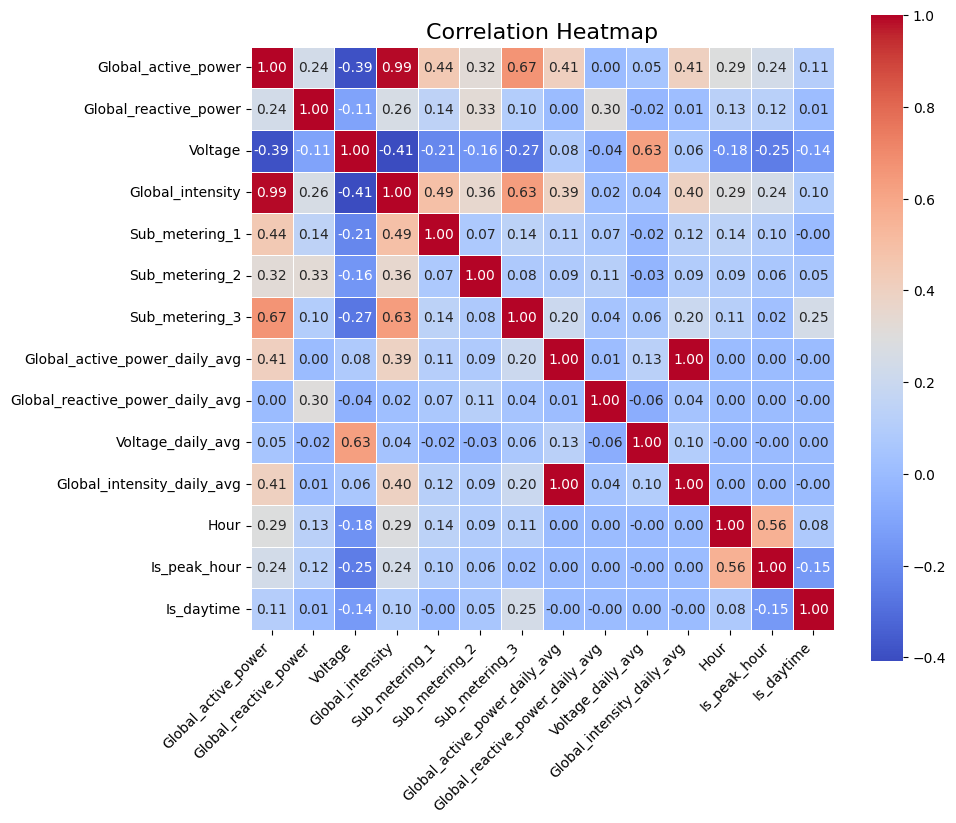

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop for correlation calculation
heatmap_data = data.drop(columns=['Date', 'Time','Datetime','key_0'], errors='ignore')

plt.figure(figsize=(10, 10))
sns.heatmap(
    heatmap_data.corr(), 
    annot=True, fmt='.2f', cmap='coolwarm', 
    square=True, linewidths=0.5, 
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [59]:
# Just check any null values are there
data.isnull().sum()

key_0                              0
Date                               0
Time                               0
Global_active_power                0
Global_reactive_power              0
Voltage                            0
Global_intensity                   0
Sub_metering_1                     0
Sub_metering_2                     0
Sub_metering_3                     0
Global_active_power_daily_avg      0
Global_reactive_power_daily_avg    0
Voltage_daily_avg                  0
Global_intensity_daily_avg         0
Datetime                           0
Hour                               0
Is_peak_hour                       0
Is_daytime                         0
dtype: int64

In [60]:
data.shape

(2049280, 18)

In [61]:
data.drop(columns=['key_0', 'Date', 'Time'], inplace=True)

In [63]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_daily_avg,Global_reactive_power_daily_avg,Voltage_daily_avg,Global_intensity_daily_avg,Datetime,Hour,Is_peak_hour,Is_daytime
0,3.358,0.41800,234.84,17.960948,0.0,0.693147,2.890372,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:24:00,17,1,1
1,3.358,0.43600,233.63,17.960948,0.0,0.693147,2.833213,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:25:00,17,1,1
2,3.358,0.46188,233.29,17.960948,0.0,1.098612,2.890372,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:26:00,17,1,1
3,3.358,0.46188,233.74,17.960948,0.0,0.693147,2.890372,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:27:00,17,1,1
4,3.358,0.46188,235.68,15.800000,0.0,0.693147,2.890372,2.852621,0.086987,236.243763,12.721702,2006-12-16 17:28:00,17,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049275,0.946,0.00000,240.43,4.000000,0.0,0.000000,0.000000,1.163360,0.093262,240.291029,4.956264,2010-11-26 20:58:00,20,1,0
2049276,0.944,0.00000,240.00,4.000000,0.0,0.000000,0.000000,1.163360,0.093262,240.291029,4.956264,2010-11-26 20:59:00,20,1,0
2049277,0.938,0.00000,239.82,3.800000,0.0,0.000000,0.000000,1.163360,0.093262,240.291029,4.956264,2010-11-26 21:00:00,21,1,0
2049278,0.934,0.00000,239.70,3.800000,0.0,0.000000,0.000000,1.163360,0.093262,240.291029,4.956264,2010-11-26 21:01:00,21,1,0


In [64]:
data.to_csv('updated_features.csv', index = False)